In [1]:
from tqdm import tqdm
from PIL import Image
import cv2
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt


from numpy import asarray
from numpy import save

In [2]:
train_df = pd.read_csv('MESSIDORC/messidor_data.csv')

In [6]:
train_df.tail(50)

,image_id,adjudicated_dr_grade,adjudicated_dme,adjudicated_gradable
1698,IM004439.jpg,0.0,0.0,1
1699,IM004440.jpg,0.0,0.0,1
1700,IM004461.jpg,0.0,0.0,1
1701,IM004462.jpg,0.0,0.0,1
1702,IM004470.jpg,0.0,0.0,1
1703,IM004471.jpg,0.0,0.0,1
1704,IM004493.jpg,0.0,0.0,1
1705,IM004494.jpg,0.0,0.0,1
1706,IM004507.jpg,2.0,0.0,1
1707,IM004508.jpg,2.0,0.0,1


In [8]:
def crop_image_from_gray(img, tol=7):
    
    if img.ndim == 2:
        mask = img > tol
        return img[np.ix_(mask.any(1),mask.any(0))]

    elif img.ndim == 3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img > tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): 
            return img 
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            img = np.stack([img1,img2,img3],axis=-1)
        return img

In [9]:
def circle_crop1(img, sigmaX = 30):   
  
    img = crop_image_from_gray(img)  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.addWeighted(img,4, cv2.GaussianBlur( img , (0,0) , sigmaX) ,-4 ,128)
    return img 

In [10]:
def resize(image_pil, width, height):
    
    ratio_w = width / image_pil.width
    ratio_h = height / image_pil.height
    if ratio_w < ratio_h:

        resize_width = width
        resize_height = round(ratio_w * image_pil.height)
    else:

        resize_width = round(ratio_h * image_pil.width)
        resize_height = height
    image_resize = image_pil.resize((resize_width, resize_height), Image.ANTIALIAS)
    background = Image.new('RGBA', (width, height), (0, 0, 0, 0)) #fondo negro o blanco
    offset = (round((width - resize_width) / 2), round((height - resize_height) / 2))
    background.paste(image_resize, offset)
    return background.convert('RGB')

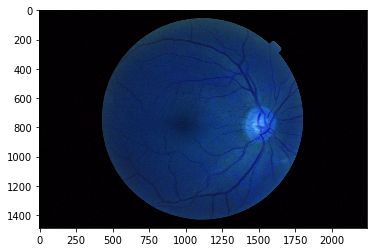

In [5]:
img=cv2.imread(f'MESSIDORC/Total/20051020_43808_0100_PP.png')
plt.imshow(img)

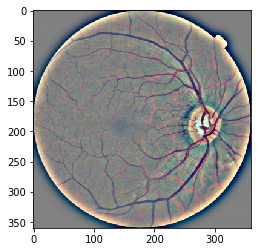

In [12]:
img = cv2.imread('MESSIDORC/Total/20051020_43808_0100_PP.png')
img=circle_crop1(img)
pilimage =Image.fromarray(img)
img =resize(pilimage,360,360)
    
plt.imshow(img)

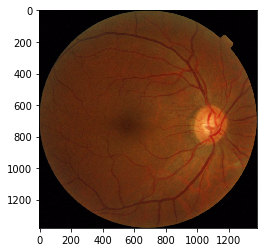

In [13]:
img = cv2.imread('MESSIDORC/Total/20051020_43808_0100_PP.png')
image = crop_image_from_gray(img)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [19]:
from tqdm import tqdm
import os

DIR = 'MESSIDORC/Total/'  #carpeta con el dataset ya preprocesado manualmente (sin imagenes repetidas o corruptas o que sean de un platillo diferente, etc)
DIR2 = 'MESSIDORC/messi-128' #capeta destino que contiene sub-carpetas con los nombres objetivo del anterior código vacias o una copia de la carpta anterior

IMG_size = 128  # tamaño de la imagen, usualmente utilizo 80 0 124, porque los archivos .pickle o .npy son muy grandes y saturan la ram 
          # cuando los cargo en colab para realizar el entrenamiento

for i, image_id in enumerate(tqdm(train_df['image_id'])):
    img = cv2.imread(DIR+'/'+image_id)
    img = crop_image_from_gray(img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    pilimage =Image.fromarray(img)
    img =resize(pilimage,IMG_size,IMG_size)
    img.save(DIR2+'/'+image_id)

100%|██████████| 1748/1748 [35:38<00:00,  1.22s/it]


# circle crop

In [23]:
from tqdm import tqdm
import os

DIR = 'MESSIDORC/Total/'  #carpeta con el dataset ya preprocesado manualmente (sin imagenes repetidas o corruptas o que sean de un platillo diferente, etc)
DIR2 = 'MESSIDORC/messi-360-c' #capeta destino que contiene sub-carpetas con los nombres objetivo del anterior código vacias o una copia de la carpta anterior

IMG_size = 360  # tamaño de la imagen, usualmente utilizo 80 0 124, porque los archivos .pickle o .npy son muy grandes y saturan la ram 
          # cuando los cargo en colab para realizar el entrenamiento

for i, image_id in enumerate(tqdm(train_df['image_id'])):
    img = cv2.imread(DIR+'/'+image_id)
    img = circle_crop1(img)
    pilimage =Image.fromarray(img)
    img =resize(pilimage,IMG_size,IMG_size)
    img.save(DIR2+'/'+image_id)

100%|██████████| 1748/1748 [1:32:08<00:00,  3.16s/it]


In [46]:
from tqdm import tqdm
import os

DIR = 'MESSIDORC/messi-360-c'  #carpeta con el dataset ya preprocesado manualmente (sin imagenes repetidas o corruptas o que sean de un platillo diferente, etc)
DIR2 = 'MESSIDORC/messi-320-c' #capeta destino que contiene sub-carpetas con los nombres objetivo del anterior código vacias o una copia de la carpta anterior

IMG_size = 320  # tamaño de la imagen, usualmente utilizo 80 0 124, porque los archivos .pickle o .npy son muy grandes y saturan la ram 
          # cuando los cargo en colab para realizar el entrenamiento

for i, image_id in enumerate(tqdm(train_df['image_id'])):
    img = cv2.imread(DIR+'/'+image_id)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pilimage =Image.fromarray(img)
    img =resize(pilimage,IMG_size,IMG_size)
    img.save(DIR2+'/'+image_id)




  0%|          | 0/1748 [00:00<?, ?it/s]


  0%|          | 1/1748 [00:00<11:34,  2.52it/s]


  0%|          | 2/1748 [00:01<13:34,  2.14it/s]


  0%|          | 3/1748 [00:01<13:38,  2.13it/s]


  0%|          | 4/1748 [00:02<15:12,  1.91it/s]


  0%|          | 5/1748 [00:02<15:01,  1.93it/s]


  0%|          | 6/1748 [00:03<15:16,  1.90it/s]


  0%|          | 7/1748 [00:03<14:53,  1.95it/s]


  0%|          | 8/1748 [00:04<13:54,  2.09it/s]


  1%|          | 9/1748 [00:04<15:23,  1.88it/s]


  1%|          | 10/1748 [00:05<13:53,  2.08it/s]


  1%|          | 11/1748 [00:05<12:26,  2.33it/s]


  1%|          | 12/1748 [00:05<10:35,  2.73it/s]


  1%|          | 13/1748 [00:06<11:03,  2.61it/s]


  1%|          | 14/1748 [00:06<10:23,  2.78it/s]


  1%|          | 15/1748 [00:06<09:27,  3.05it/s]


  1%|          | 16/1748 [00:06<09:40,  2.98it/s]


  1%|          | 17/1748 [00:07<09:59,  2.89it/s]


  1%|          | 18/1748 [00:07<10:37,  2.71it/s]


  1%|          | 19/1748 [0

  8%|▊         | 134/1748 [01:01<10:49,  2.48it/s]


  8%|▊         | 135/1748 [01:01<10:09,  2.65it/s]


  8%|▊         | 136/1748 [01:02<10:16,  2.61it/s]


  8%|▊         | 137/1748 [01:02<10:06,  2.66it/s]


  8%|▊         | 138/1748 [01:02<09:48,  2.74it/s]


  8%|▊         | 139/1748 [01:03<09:38,  2.78it/s]


  8%|▊         | 140/1748 [01:03<09:39,  2.77it/s]


  8%|▊         | 141/1748 [01:04<11:11,  2.39it/s]


  8%|▊         | 142/1748 [01:04<11:49,  2.26it/s]


  8%|▊         | 143/1748 [01:05<12:11,  2.19it/s]


  8%|▊         | 144/1748 [01:05<13:20,  2.00it/s]


  8%|▊         | 145/1748 [01:06<12:26,  2.15it/s]


  8%|▊         | 146/1748 [01:06<12:46,  2.09it/s]


  8%|▊         | 147/1748 [01:07<12:32,  2.13it/s]


  8%|▊         | 148/1748 [01:07<11:55,  2.24it/s]


  9%|▊         | 149/1748 [01:07<12:03,  2.21it/s]


  9%|▊         | 150/1748 [01:08<11:55,  2.23it/s]


  9%|▊         | 151/1748 [01:08<12:04,  2.20it/s]


  9%|▊         | 152/1748 [01:09<11:21,  2.34i

 23%|██▎       | 398/1748 [02:52<11:28,  1.96it/s]


 23%|██▎       | 399/1748 [02:53<11:30,  1.95it/s]


 23%|██▎       | 400/1748 [02:54<12:17,  1.83it/s]


 23%|██▎       | 401/1748 [02:54<11:55,  1.88it/s]


 23%|██▎       | 402/1748 [02:55<12:57,  1.73it/s]


 23%|██▎       | 403/1748 [02:55<12:08,  1.85it/s]


 23%|██▎       | 404/1748 [02:56<12:35,  1.78it/s]


 23%|██▎       | 405/1748 [02:56<12:36,  1.77it/s]


 23%|██▎       | 406/1748 [02:57<13:32,  1.65it/s]


 23%|██▎       | 407/1748 [02:58<13:29,  1.66it/s]


 23%|██▎       | 408/1748 [02:58<13:19,  1.68it/s]


 23%|██▎       | 409/1748 [02:59<13:01,  1.71it/s]


 23%|██▎       | 410/1748 [03:00<14:45,  1.51it/s]


 24%|██▎       | 411/1748 [03:00<14:57,  1.49it/s]


 24%|██▎       | 412/1748 [03:01<13:56,  1.60it/s]


 24%|██▎       | 413/1748 [03:02<14:05,  1.58it/s]


 24%|██▎       | 414/1748 [03:02<15:12,  1.46it/s]


 24%|██▎       | 415/1748 [03:03<15:25,  1.44it/s]


 24%|██▍       | 416/1748 [03:04<16:49,  1.32i

 38%|███▊      | 662/1748 [05:10<11:57,  1.51it/s]


 38%|███▊      | 663/1748 [05:10<11:57,  1.51it/s]


 38%|███▊      | 664/1748 [05:11<12:09,  1.49it/s]


 38%|███▊      | 665/1748 [05:11<10:46,  1.68it/s]


 38%|███▊      | 666/1748 [05:12<10:00,  1.80it/s]


 38%|███▊      | 667/1748 [05:12<09:35,  1.88it/s]


 38%|███▊      | 668/1748 [05:13<09:32,  1.89it/s]


 38%|███▊      | 669/1748 [05:13<10:35,  1.70it/s]


 38%|███▊      | 670/1748 [05:14<10:46,  1.67it/s]


 38%|███▊      | 671/1748 [05:15<10:38,  1.69it/s]


 38%|███▊      | 672/1748 [05:15<10:45,  1.67it/s]


 39%|███▊      | 673/1748 [05:16<10:28,  1.71it/s]


 39%|███▊      | 674/1748 [05:17<11:14,  1.59it/s]


 39%|███▊      | 675/1748 [05:17<11:06,  1.61it/s]


 39%|███▊      | 676/1748 [05:18<12:06,  1.48it/s]


 39%|███▊      | 677/1748 [05:19<12:56,  1.38it/s]


 39%|███▉      | 678/1748 [05:20<13:19,  1.34it/s]


 39%|███▉      | 679/1748 [05:20<13:27,  1.32it/s]


 39%|███▉      | 680/1748 [05:21<14:06,  1.26i

 53%|█████▎    | 926/1748 [07:37<03:45,  3.64it/s]


 53%|█████▎    | 927/1748 [07:37<03:17,  4.17it/s]


 53%|█████▎    | 928/1748 [07:37<03:04,  4.45it/s]


 53%|█████▎    | 929/1748 [07:37<03:29,  3.90it/s]


 53%|█████▎    | 930/1748 [07:38<03:39,  3.72it/s]


 53%|█████▎    | 931/1748 [07:38<03:44,  3.64it/s]


 53%|█████▎    | 932/1748 [07:38<04:04,  3.33it/s]


 53%|█████▎    | 933/1748 [07:39<04:11,  3.24it/s]


 53%|█████▎    | 934/1748 [07:39<04:27,  3.04it/s]


 53%|█████▎    | 935/1748 [07:40<04:42,  2.87it/s]


 54%|█████▎    | 936/1748 [07:40<05:00,  2.70it/s]


 54%|█████▎    | 937/1748 [07:40<05:04,  2.67it/s]


 54%|█████▎    | 938/1748 [07:41<04:59,  2.71it/s]


 54%|█████▎    | 939/1748 [07:41<05:27,  2.47it/s]


 54%|█████▍    | 940/1748 [07:42<05:23,  2.50it/s]


 54%|█████▍    | 941/1748 [07:42<05:26,  2.48it/s]


 54%|█████▍    | 942/1748 [07:42<05:44,  2.34it/s]


 54%|█████▍    | 943/1748 [07:43<05:55,  2.26it/s]


 54%|█████▍    | 944/1748 [07:43<05:24,  2.48i

 70%|██████▉   | 1217/1748 [08:44<01:56,  4.54it/s]


 70%|██████▉   | 1218/1748 [08:44<01:59,  4.44it/s]


 70%|██████▉   | 1219/1748 [08:45<01:53,  4.68it/s]


 70%|██████▉   | 1220/1748 [08:45<01:45,  5.01it/s]


 70%|██████▉   | 1221/1748 [08:45<01:39,  5.29it/s]


 70%|██████▉   | 1222/1748 [08:45<01:33,  5.60it/s]


 70%|██████▉   | 1223/1748 [08:45<01:31,  5.76it/s]


 70%|███████   | 1224/1748 [08:46<01:46,  4.90it/s]


 70%|███████   | 1225/1748 [08:46<01:43,  5.03it/s]


 70%|███████   | 1226/1748 [08:46<01:34,  5.50it/s]


 70%|███████   | 1227/1748 [08:46<01:27,  5.95it/s]


 70%|███████   | 1229/1748 [08:46<01:24,  6.16it/s]


 70%|███████   | 1230/1748 [08:47<01:28,  5.84it/s]


 70%|███████   | 1231/1748 [08:47<01:17,  6.67it/s]


 70%|███████   | 1232/1748 [08:47<01:16,  6.71it/s]


 71%|███████   | 1233/1748 [08:47<01:21,  6.29it/s]


 71%|███████   | 1235/1748 [08:47<01:19,  6.46it/s]


 71%|███████   | 1236/1748 [08:47<01:21,  6.28it/s]


 71%|███████   | 1237/1748 [

 87%|████████▋ | 1516/1748 [09:35<01:05,  3.54it/s]


 87%|████████▋ | 1517/1748 [09:36<00:55,  4.15it/s]


 87%|████████▋ | 1518/1748 [09:36<01:00,  3.80it/s]


 87%|████████▋ | 1519/1748 [09:36<00:51,  4.43it/s]


 87%|████████▋ | 1520/1748 [09:36<00:53,  4.25it/s]


 87%|████████▋ | 1521/1748 [09:37<01:05,  3.44it/s]


 87%|████████▋ | 1522/1748 [09:37<01:01,  3.65it/s]


 87%|████████▋ | 1523/1748 [09:37<00:59,  3.79it/s]


 87%|████████▋ | 1525/1748 [09:38<00:56,  3.97it/s]


 87%|████████▋ | 1526/1748 [09:38<00:59,  3.76it/s]


 87%|████████▋ | 1527/1748 [09:38<00:56,  3.92it/s]


 87%|████████▋ | 1528/1748 [09:38<00:54,  4.01it/s]


 87%|████████▋ | 1529/1748 [09:39<00:54,  4.01it/s]


 88%|████████▊ | 1530/1748 [09:39<00:56,  3.83it/s]


 88%|████████▊ | 1531/1748 [09:39<00:56,  3.81it/s]


 88%|████████▊ | 1532/1748 [09:39<01:02,  3.48it/s]


 88%|████████▊ | 1533/1748 [09:40<01:02,  3.42it/s]


 88%|████████▊ | 1534/1748 [09:40<00:57,  3.72it/s]


 88%|████████▊ | 1536/1748 [

# creamos arrays

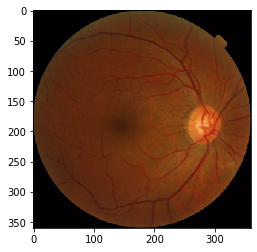

In [47]:
image = cv2.imread(f'MESSIDORC/messi-360/20051020_43808_0100_PP.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

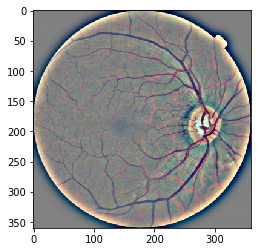

In [42]:
image = cv2.imread(f'MESSIDORC/messi-360-c/20051020_43808_0100_PP.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [75]:
IMG_SIZE= 360




num_channels = 3 # canales, rgb, escala de grises
xtrain = np.zeros((1748, IMG_SIZE, IMG_SIZE, num_channels), dtype=np.uint8)


for i, image_id in enumerate(tqdm(train_df['image_id'])):
    image = cv2.imread(f'MESSIDORC/messi-360-c/{image_id}')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    xtrain[i,:,:,:] = image




  0%|          | 0/1748 [00:00<?, ?it/s]


  0%|          | 2/1748 [00:00<01:39, 17.60it/s]


  0%|          | 3/1748 [00:00<02:39, 10.95it/s]


  0%|          | 6/1748 [00:00<02:30, 11.56it/s]


  1%|          | 10/1748 [00:00<01:59, 14.53it/s]


  1%|          | 12/1748 [00:00<02:14, 12.89it/s]


  1%|          | 15/1748 [00:01<02:09, 13.35it/s]


  1%|          | 18/1748 [00:01<01:49, 15.81it/s]


  1%|          | 20/1748 [00:01<01:59, 14.49it/s]


  1%|▏         | 24/1748 [00:01<01:55, 14.96it/s]


  2%|▏         | 27/1748 [00:01<01:49, 15.75it/s]


  2%|▏         | 29/1748 [00:01<01:46, 16.19it/s]


  2%|▏         | 31/1748 [00:02<02:11, 13.07it/s]


  2%|▏         | 36/1748 [00:02<02:02, 13.96it/s]


  2%|▏         | 38/1748 [00:02<02:15, 12.66it/s]


  3%|▎         | 45/1748 [00:02<01:58, 14.42it/s]


  3%|▎         | 47/1748 [00:03<02:08, 13.21it/s]


  3%|▎         | 52/1748 [00:03<01:52, 15.04it/s]


  3%|▎         | 55/1748 [00:03<01:52, 15.10it/s]


  3%|▎         | 57/1

 55%|█████▌    | 964/1748 [00:41<00:37, 20.87it/s]


 55%|█████▌    | 968/1748 [00:41<00:36, 21.53it/s]


 56%|█████▌    | 971/1748 [00:41<00:33, 23.32it/s]


 56%|█████▌    | 977/1748 [00:41<00:32, 23.84it/s]


 56%|█████▌    | 980/1748 [00:42<00:39, 19.62it/s]


 56%|█████▋    | 984/1748 [00:42<00:33, 22.84it/s]


 56%|█████▋    | 987/1748 [00:42<00:36, 21.02it/s]


 57%|█████▋    | 992/1748 [00:42<00:33, 22.24it/s]


 57%|█████▋    | 995/1748 [00:42<00:31, 23.93it/s]


 57%|█████▋    | 998/1748 [00:42<00:33, 22.48it/s]


 57%|█████▋    | 1001/1748 [00:43<00:32, 22.79it/s]


 57%|█████▋    | 1004/1748 [00:43<00:36, 20.65it/s]


 58%|█████▊    | 1007/1748 [00:43<00:36, 20.06it/s]


 58%|█████▊    | 1011/1748 [00:43<00:31, 23.08it/s]


 58%|█████▊    | 1014/1748 [00:43<00:36, 20.27it/s]


 58%|█████▊    | 1018/1748 [00:43<00:30, 23.60it/s]


 58%|█████▊    | 1021/1748 [00:44<00:38, 18.88it/s]


 59%|█████▊    | 1025/1748 [00:44<00:33, 21.74it/s]


 59%|█████▉    | 1028/1748 [00:44<00:3

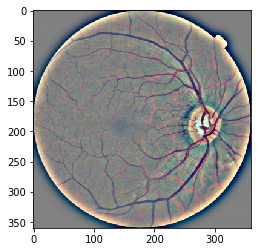

In [76]:
plt.imshow(xtrain[0])

In [77]:
from numpy import asarray
from numpy import save

data = asarray(xtrain)
save('MESSIDORC/messi360-c.npy', data)